In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


file= './birthweight_low.xlsx'

birthweight_2 = pd.read_excel(file)

birthweight_2.head(n=5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956


In [18]:
birthweight_2.describe()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,196.000000,193.000000,196.000000,193.000000,196.000000,189.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,40.153061,13.911917,2.341837,11.601036,39.290816,13.846561,8.193878,8.964286,10.928571,5.397959,0.551020,0.270408,0.382653,0.346939,0.346939,0.341837,0.311224,3334.086735
std,10.250055,2.055864,1.355136,4.267293,8.982725,2.634217,1.576482,0.651428,6.101282,3.001674,0.498664,0.445308,0.487279,0.477215,0.477215,0.475540,0.464180,646.700904
min,23.000000,8.000000,1.000000,2.000000,23.000000,1.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,697.000000
25%,33.000000,12.000000,2.000000,10.000000,34.750000,12.000000,8.000000,9.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2916.250000
50%,39.000000,14.000000,2.000000,12.000000,38.000000,14.000000,9.000000,9.000000,11.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3452.000000
75%,46.000000,16.000000,3.000000,12.000000,43.000000,16.000000,9.000000,9.000000,15.250000,7.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3759.500000
max,71.000000,17.000000,8.000000,35.000000,73.000000,17.000000,10.000000,10.000000,25.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4933.000000


In [19]:
birthweight_2.isnull().sum(axis = 0)

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [20]:
for col in birthweight_2:

    # creating columns with 1s if missing and 0 if not
    if birthweight_2[col].isnull().astype(int).sum() > 0:
        birthweight_2['m_'+col] = birthweight_2[col].isnull().astype(int)


# summing the missing value flags to check the results of the loop above
birthweight_2[    ['m_meduc', 'm_npvis',
             'm_feduc']    ].sum(axis = 0)

m_meduc    3
m_npvis    3
m_feduc    7
dtype: int64

In [21]:

birthweight_2['meduc'] = birthweight_2['meduc'].fillna(birthweight_2['meduc'].mean())
birthweight_2['npvis'] = birthweight_2['npvis'].fillna(birthweight_2['npvis'].mean())
birthweight_2['feduc'] = birthweight_2['feduc'].fillna(birthweight_2['feduc'].mean())

In [22]:
birthweight_2.isnull().sum(axis = 0)


mage       0
meduc      0
monpre     0
npvis      0
fage       0
feduc      0
omaps      0
fmaps      0
cigs       0
drink      0
male       0
mwhte      0
mblck      0
moth       0
fwhte      0
fblck      0
foth       0
bwght      0
m_meduc    0
m_npvis    0
m_feduc    0
dtype: int64

In [23]:
y= birthweight_2['bwght']

x_full = birthweight_2.drop(['bwght', 'moth','foth'], axis =1)

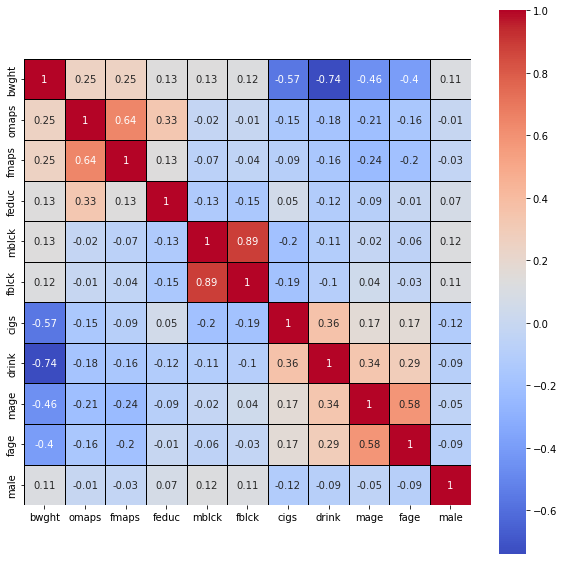

bwght      1.00
omaps      0.25
fmaps      0.25
feduc      0.13
mblck      0.13
fblck      0.12
male       0.11
meduc      0.09
m_npvis    0.06
npvis      0.06
m_feduc   -0.00
moth      -0.02
fwhte     -0.04
monpre    -0.05
foth      -0.08
mwhte     -0.11
m_meduc   -0.13
fage      -0.40
mage      -0.46
cigs      -0.57
drink     -0.74
Name: bwght, dtype: float64


In [24]:
# creating a (Pearson) correlation matrix
birth_corr = birthweight_2.corr().round(2)

# limiting the size of the correlation matrix
birth_corr2 = birth_corr.loc[ ['bwght', 'omaps', 'fmaps',
                               'feduc', 'mblck', 'fblck', 'cigs', 'drink', 'mage', 'fage', 'male'],
                              ['bwght', 'omaps', 'fmaps',
                               'feduc', 'mblck', 'fblck', 'cigs', 'drink', 'mage', 'fage', 'male']]

# setting figure size
fig, ax = plt.subplots(figsize=(10,10))

# visualizing the correlation matrix
sns.heatmap(birth_corr2,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)

plt.show()


# printing (Pearson) correlations with SalePrice
print(birth_corr.loc['bwght'].sort_values(ascending = False))

In [ ]:
lm_ols = smf.ols(formula = """bwght ~ drink  +
                                      cigs +
                                      omaps  +
                                     fmaps """,
                  data = birthweight_2)

# telling Python to run the data through the blueprint
results_ols = lm_ols.fit()


# printing the results
print(results_ols.summary())

In [25]:
birthweight_2.skew().round(2)

mage       0.92
meduc     -0.07
monpre     2.03
npvis      2.23
fage       1.12
feduc     -1.33
omaps     -2.64
fmaps     -2.55
cigs       0.03
drink      0.23
male      -0.21
mwhte      1.04
mblck      0.49
moth       0.65
fwhte      0.65
fblck      0.67
foth       0.82
bwght     -0.66
m_meduc    7.96
m_npvis    7.96
m_feduc    5.04
dtype: float64

In [26]:
birthweight_2['log_monpre'] = np.log(birthweight_2['monpre'])
birthweight_2['log_npvis'] = np.log(birthweight_2['npvis'])
birthweight_2['log_fage'] = np.log(birthweight_2['fage'])
birthweight_2['log_omaps'] = np.log(birthweight_2['omaps'])
birthweight_2['log_fmaps'] = np.log(birthweight_2['fmaps'])


In [27]:
birth_corr = birthweight_2.corr().round(2)

In [28]:
print(birth_corr.loc['bwght'].sort_values(ascending = False))

bwght         1.00
log_fmaps     0.26
log_omaps     0.26
omaps         0.25
fmaps         0.25
log_npvis     0.16
feduc         0.13
mblck         0.13
fblck         0.12
male          0.11
meduc         0.09
npvis         0.06
m_npvis       0.06
m_feduc      -0.00
moth         -0.02
fwhte        -0.04
monpre       -0.05
log_monpre   -0.06
foth         -0.08
mwhte        -0.11
m_meduc      -0.13
log_fage     -0.38
fage         -0.40
mage         -0.46
cigs         -0.57
drink        -0.74
Name: bwght, dtype: float64


In [29]:
lm_ols = smf.ols(formula = """bwght ~ drink  +
                                      cigs +
                                        fage +
                                     fmaps + mage  """,
                  data = birthweight_2)

# telling Python to run the data through the blueprint
results_ols = lm_ols.fit()


# printing the results
print(results_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     95.08
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           8.42e-50
Time:                        17:58:27   Log-Likelihood:                -1423.3
No. Observations:                 196   AIC:                             2859.
Df Residuals:                     190   BIC:                             2878.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4226.7312    406.125     10.407      0.0

In [39]:
# creating the OLS dataset
x_ols = birthweight_2.loc[: , ['drink', 'cigs', 'log_fmaps']]

In [40]:
from sklearn.model_selection import train_test_split

# splitting the ols dataset
x_train_ols, x_test_ols, y_train_ols, y_test_ols = train_test_split(x_ols, y, random_state = 219, test_size = 0.25)

In [41]:
from sklearn.linear_model import LinearRegression

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_fit = reg_all.fit(x_train_ols, y_train_ols)

# Predict on the test data: y_pred
y_pred = reg_fit.predict(x_test_ols)

# SCORING the results
print('OLS Training Score :', reg_all.score(x_train_ols, y_train_ols).round(4))  # using R-square
print('OLS Testing Score  :', reg_all.score(x_test_ols, y_test_ols).round(4)) # using R-square

# saving the scores
reg_train_score = reg_all.score(x_train_ols, y_train_ols).round(4)
reg_test_score = reg_all.score(x_test_ols, y_test_ols).round(4)


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(reg_train_score - reg_test_score).round(4))
reg_test_gap = abs(reg_train_score - reg_test_score).round(4)

OLS Training Score : 0.6642
OLS Testing Score  : 0.7056
OLS Train-Test Gap : 0.0414


In [42]:
import sklearn.linear_model
ard_model = sklearn.linear_model.ARDRegression()


# Fit the regressor to the training data
ard_fit = ard_model.fit(x_train_ols, y_train_ols)

# Predict on the test data: y_pred
y_pred = ard_fit.predict(x_test_ols)

# SCORING the results
print('ARD Training Score :', ard_model.score(x_train_ols, y_train_ols).round(4))  # using R-square
print('ARD Testing Score  :', ard_model.score(x_test_ols, y_test_ols).round(4)) # using R-square

# saving the scores
ard_train_score = ard_model.score(x_train_ols, y_train_ols).round(4)
ard_test_score = ard_model.score(x_test_ols, y_test_ols).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

OLS Training Score : 0.6639
OLS Testing Score  : 0.7107
OLS Train-Test Gap : 0.0468


In [34]:
import sklearn.linear_model

In [38]:
# INSTANTIATING a model object



lasso_model = sklearn.linear_model.Lasso(alpha     = 1.0,  # default shrinkage
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_full, y_train_full)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_full)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_full, y_train_full).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_full, y_test_full).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_full, y_train_full).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_full, y_test_full).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.742
Lasso Testing Score  : 0.6294
Lasso Train-Test Gap : 0.1126


In [43]:
print(f"""

Chosen model: ARD  <- Important!

Model      Train Score      Test Score      Test Gap
-----      -----------      ----------      -----------
OLS        {reg_train_score}           {reg_test_score}          {reg_test_gap}
Lasso      {lasso_train_score}           {lasso_test_score}          {lasso_test_gap}
ARD        {ard_train_score}           {ard_test_score}          {ard_test_gap} <-  row with values of the chosen model!

""")



Chosen model: ARD  <- Important!

Model      Train Score      Test Score      Test Gap
-----      -----------      ----------      -----------
OLS        0.6642           0.7056          0.0414
Lasso      0.742           0.6294          0.1126
ARD        0.6639           0.7107          0.0468 <-  row with values of the chosen model!


